# 作業 2：從傳統到現代 - 文本處理方法實作與比較

**課程助教：** 陳戎新  
**電子郵件：** s711383106@gm.ntpu.edu.tw

---

### 學習目標
在生成式 AI 蓬勃發展的今天，許多人直接使用 ChatGPT 等工具，卻不了解其背後的基礎原理。本作業將帶您：

1. 親手實作傳統 NLP 方法，理解文本處理的數學基礎。
2. 使用現代 AI 完成相同任務，體驗技術進步帶來的便利。
3. 深入比較兩種方法，培養選擇適當工具的判斷力。
4. 了解技術演進脈絡，建立扎實的 NLP 知識體系。

## 1. 環境設定與套件安裝

首先，執行以下指令安裝本次作業所需的所有套件。（可依自己環境調整）

In [ ]:
# 依需要再執行安裝
!pip install --upgrade pip
!pip install -q numpy pandas matplotlib seaborn scikit-learn jieba openai tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


## Part A: 傳統方法實作 (50分)

### A-1: TF-IDF 文本相似度計算 (20分)

任務說明：實作 TF-IDF 算法，並利用它來計算文本間的相似度。您需要：
1. 手動計算 TF-IDF (10分)
2. 使用 scikit-learn 實作 (5分)
3. 視覺化成果（計入分數）

In [76]:
import jieba
import numpy as np
import pandas as pd
from collections import Counter
import math

# 測試資料
documents = [
     "我今天心情很好，很適合出去走一走",
     "我最近覺得很開心",
     "今天天氣讓我想要出去走一走",
     "我打算加班到很晚"
]

# 中文斷詞
tokenized_documents = [list(jieba.cut(doc)) for doc in documents]
print("斷詞結果:")
for i, doc in enumerate(tokenized_documents, 1):
    print(f"Document {i}: {doc}")

斷詞結果:
Document 1: ['我', '今天', '心情', '很', '好', '，', '很', '適合', '出去', '走', '一', '走']
Document 2: ['我', '最近', '覺得', '很', '開心']
Document 3: ['今天', '天氣', '讓', '我', '想要', '出去', '走', '一', '走']
Document 4: ['我', '打算', '加班', '到', '很', '晚']


#### 1. 手動實作 TF-IDF

In [77]:
def calculate_tf(word_dict, total_words):
    """計算詞頻 (Term Frequency)
    Args:
        word_dict: 詞彙計數字典 (e.g., {'人工智慧': 2, '世界': 1})
        total_words: 該文件的總詞數
    Returns:
        tf_dict: TF 值字典
    """
    # TODO: 實作 TF 計算
    # 提示：TF = (該詞在文件中出現的次數) / (文件總詞數)
    tf_dict={}
    for word,count in word_dict.items():
      tf_dict[word] = count / total_words
    return {word: cnt / total_words for word, cnt in word_dict.items()}
    raise NotImplementedError("請在此處完成 TF 計算")

def calculate_idf(documents, word):
    """計算逆文件頻率 (Inverse Document Frequency)
    Args:
        documents: 文件列表 (斷詞後的版本)
        word: 目標詞彙
    Returns:
        idf: IDF 值
    """
    # TODO: 實作 IDF 計算
    # 提示：IDF = log((總文件數) / (包含該詞的文件數 + 1))，+1 為避免分母為 0

    df = sum(1 for doc in documents if word in set(doc))
    return math.log(len(documents) / (df + 1))
    raise NotImplementedError("請在此處完成 IDF 計算")

def calculate_tfidf(tokenized_documents):
    """計算 TF-IDF 主函數
    回傳：pandas.DataFrame，列為文件，欄為詞彙
    """
    # TODO:
    # 1) 遍歷所有文件，計算每個文件的 TF
    # 2) 建立詞彙庫 (vocabulary)
    # 3) 對詞彙庫中的每個詞，計算其 IDF
    # 4) 結合 TF 和 IDF 計算每個文件中每個詞的 TF-IDF 值
    # 5) 回傳 TF-IDF 矩陣 (pandas DataFrame)
    # 邊界情況
    if not tokenized_documents:
        return pd.DataFrame()

    N = len(tokenized_documents)

    # 2) 建立詞彙庫（排序以固定欄位順序）
    vocabulary = sorted({tok for doc in tokenized_documents for tok in doc})

    # 3) 計算每個詞的文件頻率（df）與 IDF
    #    IDF = log(N / df)
    #    若某詞 df=0 幾乎不會發生（因為來自 vocabulary），但仍保險處理。
    df = {term: sum(1 for doc in tokenized_documents if term in set(doc)) for term in vocabulary}
    idf = {term: (math.log(N / df[term]) if df[term] else 0.0) for term in vocabulary}

    # 1) 遍歷文件計算 TF，4) 結合 TF 和 IDF -> TF-IDF
    rows = []
    for doc in tokenized_documents:
        total = len(doc) if len(doc) > 0 else 1  # 避免除以 0（空文件視為長度 1）
        counts = Counter(doc)
        tfidf_row = {}
        for term in vocabulary:
            tf = counts.get(term, 0) / total
            tfidf_row[term] = tf * idf[term]
        rows.append(tfidf_row)

    # 5) 回傳 TF-IDF 矩陣
    return pd.DataFrame(rows, columns=vocabulary)
    raise NotImplementedError("請在此處完成 TF-IDF 主流程")

tfidf_matrix = calculate_tfidf(tokenized_documents)
display(tfidf_matrix.head())

,一,今天,出去,到,加班,天氣,好,很,心情,想要,我,打算,晚,最近,覺得,讓,走,適合,開心,，
0,0.057762,0.057762,0.057762,0.000000,0.000000,0.000000,0.115525,0.047947,0.115525,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.115525,0.115525,0.000000,0.115525
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.057536,0.000000,0.000000,0.0,0.000000,0.000000,0.277259,0.277259,0.000000,0.000000,0.000000,0.277259,0.000000
2,0.077016,0.077016,0.077016,0.000000,0.000000,0.154033,0.000000,0.000000,0.000000,0.154033,0.0,0.000000,0.000000,0.000000,0.000000,0.154033,0.154033,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.231049,0.231049,0.000000,0.000000,0.047947,0.000000,0.000000,0.0,0.231049,0.231049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### 2. 使用 scikit-learn 實作

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TfidfVectorizer 需要以空格分隔的字串，所以我們先把斷詞結果接起來
processed_docs = [' '.join(doc) for doc in tokenized_documents]

# TODO: 使用 TfidfVectorizer 和 cosine_similarity 計算相似度矩陣
# 1) 初始化 TfidfVectorizer
vec = TfidfVectorizer(
    lowercase=False,
    token_pattern=r"(?u)\b\w+\b",
    smooth_idf=True,
    sublinear_tf=True
)
# 2) fit_transform 文本資料
X = vec.fit_transform(processed_docs)
# 3) 使用 cosine_similarity 計算向量相似度
sim = cosine_similarity(X)
sim_df = pd.DataFrame(sim, index=[f"doc{i}" for i in range(len(processed_docs))],
               columns=[f"doc{i}" for i in range(len(processed_docs))]
)
display(sim_df)
# raise NotImplementedError("請完成：scikit-learn 的 TF-IDF 與相似度計算")

,doc0,doc1,doc2,doc3
doc0,1.000000,0.176372,0.523919,0.156397
doc1,0.176372,1.000000,0.053969,0.163801
doc2,0.523919,0.053969,1.000000,0.047857
doc3,0.156397,0.163801,0.047857,1.000000


#### 3. 視覺化（熱圖）

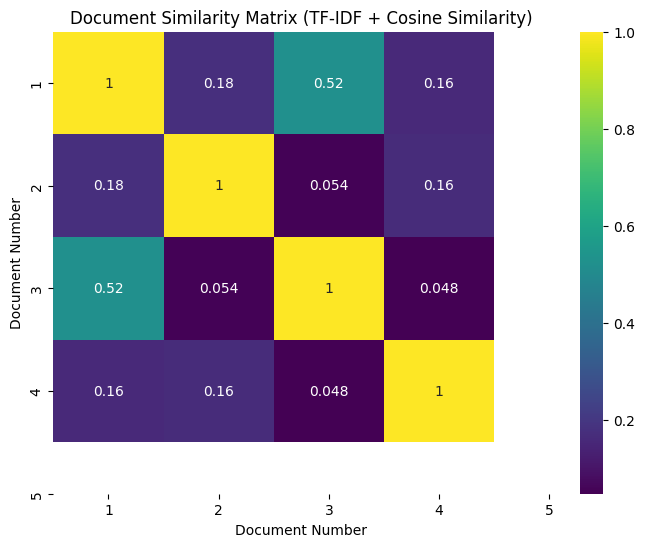

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs('results', exist_ok=True)

# TODO: 將上一步的 similarity_matrix 視覺化
similarity_matrix = sim
# 將相似度矩陣轉成 DataFrame，方便加上標籤
sim_df = pd.DataFrame(similarity_matrix,
            index=[f"doc{i}" for i in range(len(similarity_matrix))],
            columns=[f"doc{i}" for i in range(len(similarity_matrix))])
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'Noto Sans TC', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8, 6))
sns.heatmap(sim_df, annot=True, cmap='viridis', xticklabels=range(1,6), yticklabels=range(1,6))
plt.title('Document Similarity Matrix (TF-IDF + Cosine Similarity)')
plt.xlabel('Document Number')
plt.ylabel('Document Number')
plt.savefig('results/tfidf_similarity_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

### A-2: 基於規則的文本分類 (15分)
任務說明：建立規則式分類器，不使用機器學習，純粹基於關鍵詞和規則。
1. 情感分類器 (8分)
2. 主題分類器 (7分)

In [80]:
# 測試資料
test_texts = [
    "這家餐廳的牛肉麵真的太好吃了，湯頭濃郁，麵條Q彈，下次一定再來！",
    "最新的AI技術突破讓人驚豔，深度學習模型的表現越來越好",
    "這部電影劇情空洞，演技糟糕，完全是浪費時間",
    "每天慢跑5公里，配合適當的重訓，體能進步很多"
]

#### 1. 情感分類器

In [81]:
class RuleBasedSentimentClassifier:
    def __init__(self):
        # 建立正負面詞彙庫（可自行擴充）
        self.positive_words = ['好', '棒', '優秀', '喜歡', '推薦', '滿意', '開心', '值得', '精彩', '完美', '好吃', '濃郁', 'Q彈']
        self.negative_words = ['差', '糟', '失望', '討厭', '不推薦', '浪費', '無聊', '爛', '糟糕', '差勁', '空洞']
        self.negation_words = ['不', '沒', '無', '非', '別']

    def classify(self, text):
        """
        分類邏輯（請自行實作）：
        1) 計算正負詞數量
        2) 處理否定詞（否定 + 正面 → 轉負；否定 + 負面 → 轉正）
        3) （可選）程度副詞加權
        回傳：'正面' / '負面' / '中性'
        """
        # TODO: 實作情感分類邏輯
        words = list(text)  # 直接逐字掃描（簡單粗暴）
        score = 0
        flip = 1  # 否定翻轉因子

        for i, w in enumerate(words):
          if w in self.negation_words:
             flip *= -1
          elif w in self.positive_words:
             score += 1 * flip
             flip = 1
          elif w in self.negative_words:
             score -= 1 * flip
             flip = 1

        if score > 0:
         return '正面'
        elif score < 0:
         return '負面'
        else:
         return '中性'
        raise NotImplementedError("請完成情感分類器 classify()")

# 範例：完成後可取消註解
sentiment_classifier = RuleBasedSentimentClassifier()
for text in test_texts:
    sentiment = sentiment_classifier.classify(text)
    print(f'文本: "{text[:20]}..." -> 情感: {sentiment}')

文本: "這家餐廳的牛肉麵真的太好吃了，湯頭濃郁，..." -> 情感: 正面
文本: "最新的AI技術突破讓人驚豔，深度學習模型..." -> 情感: 正面
文本: "這部電影劇情空洞，演技糟糕，完全是浪費時..." -> 情感: 負面
文本: "每天慢跑5公里，配合適當的重訓，體能進步..." -> 情感: 中性


#### 2. 主題分類器

In [82]:
class TopicClassifier:
    def __init__(self):
        self.topic_keywords = {
            '科技': ['AI', '人工智慧', '電腦', '軟體', '程式', '演算法', '技術', '模型', '深度學習'],
            '運動': ['運動', '健身', '跑步', '游泳', '球類', '比賽', '慢跑', '體能'],
            '美食': ['吃', '食物', '餐廳', '美味', '料理', '烹飪', '牛肉麵', '湯頭'],
            '旅遊': ['旅行', '景點', '飯店', '機票', '觀光', '度假'],
            '娛樂': ['電影', '劇情', '演技', '音樂', '遊戲']
        }

    def classify(self, text):
        """返回最可能的主題（請實作關鍵詞計分）"""
        # TODO: 計算每個主題關鍵詞在文本中出現次數，回傳分數最高主題
        scores = {}

        for topic, keywords in self.topic_keywords.items():
          count = sum(text.count(k) for k in keywords)
          scores[topic] = count

        # 取最高分的主題
        best_topic = max(scores, key=scores.get)

        # 若所有分數都為 0，代表無法判斷主題
        if scores[best_topic] == 0:
          return '未知'

        return best_topic
        raise NotImplementedError("請完成主題分類器 classify()")

# 範例：完成後可取消註解
topic_classifier = TopicClassifier()
for text in test_texts:
     topic = topic_classifier.classify(text)
     print(f'文本: "{text[:20]}..." -> 主題: {topic}')

文本: "這家餐廳的牛肉麵真的太好吃了，湯頭濃郁，..." -> 主題: 美食
文本: "最新的AI技術突破讓人驚豔，深度學習模型..." -> 主題: 科技
文本: "這部電影劇情空洞，演技糟糕，完全是浪費時..." -> 主題: 娛樂
文本: "每天慢跑5公里，配合適當的重訓，體能進步..." -> 主題: 運動


### A-3: 統計式自動摘要 (15分)
任務說明：使用統計方法實作摘要系統，不依賴現代生成式 AI。

In [83]:
# 測試文章（可自行替換）
article = (
    "人工智慧（AI）的發展正深刻改變我們的生活方式。從早上起床時的智慧鬧鐘，到通勤時的路線規劃，再到工作中的各種輔助工具，AI無處不在。\n"
    "在醫療領域，AI協助醫生進行疾病診斷，提高了診斷的準確率和效率。透過分析大量的醫療影像和病歷資料，AI能夠發現人眼容易忽略的細節，為患者提供更好的治療方案。\n"
    "教育方面，AI個人化學習系統能夠根據每個學生的學習進度和特點，提供客製化的教學內容。這種因材施教的方式，讓學習變得更加高效和有趣。\n"
    "然而，AI的快速發展也帶來了一些挑戰。首先是就業問題，許多傳統工作可能會被AI取代。其次是隱私和安全問題，AI系統需要大量數據來訓練，如何保護個人隱私成為重要議題。最後是倫理問題，AI的決策過程往往缺乏透明度，可能會產生偏見或歧視。\n"
    "面對這些挑戰，我們需要在推動AI發展的同時，建立相應的法律法規和倫理準則。只有這樣，才能確保AI技術真正為人類福祉服務，創造一個更美好的未來。\n"
)

import re
from collections import Counter
class StatisticalSummarizer:
    def __init__(self):
        # 載入停用詞（繁體）
        self.stop_words = set("""
        的 了 在 是 和 有 與 就 也 都 而 及 著 或 被 對 於 以 為 讓 使 很 更 最
        並 且 又 又是 且是 但 但是 不過 因為 因此 所以 如果 如此 然而 而且
        我 你 他 她 它 我們 你們 他們 這 那 這些 那些 這樣 那樣
        一個 一些 之 其 及其 以及 每個 各種
        the a an and or for of to in on with from by as at is are was were be been
        """.split())

    def _split_sentences(self, text):
        # 粗略中文分句：依 。！？ 及換行分割
        sents = re.split(r"[。！？\n]+", text)
        return [s.strip() for s in sents if s.strip()]
    def _tokenize(self, text):
        """中文逐字 + 英文/數字連串；濾停用詞"""
        zh = re.findall(r"[\u4e00-\u9fff]", text)
        en = re.findall(r"[A-Za-z]{2,}|\d+", text.lower())
        tokens = zh + en
        return [t for t in tokens if t not in self.stop_words]

    def sentence_score(self, sentence, word_freq, idx, n_sent):
        """計算句子重要性分數（請自行設計）
        可考慮：高頻詞數量、句子位置(首尾加權)、句長懲罰、是否含數字／專有名詞等
        """
        # TODO: 實作句子評分邏輯
        toks = self._tokenize(sentence)
        if not toks:
            return 0.0

        base = sum(word_freq[t] for t in toks)
        length_penalty = (1 + len(toks)) ** 0.5

        # 位置加權：首句/尾句 > 前 20% > 其餘
        if idx == 0 or idx == n_sent - 1:
            pos_w = 1.20
        elif idx < max(1, int(0.2 * n_sent)):
            pos_w = 1.08
        else:
            pos_w = 1.0

        # 太短或太長再微調
        if len(toks) < 4:
            pos_w *= 0.70
        elif len(toks) > 50:
            pos_w *= 0.9

        return (base / length_penalty) * pos_w
        raise NotImplementedError("請完成 sentence_score() 設計")

    def summarize(self, text, ratio=0.3):
        """
        生成摘要步驟建議：
        1) 分句
        2) 分詞並計算詞頻（過濾停用詞與標點）
        3) 計算每句分數
        4) 依 ratio 選取 Top-K 句子
        5) 依原文順序輸出摘要
        """
        # TODO: 實作摘要主流程
        sents = self._split_sentences(text)
        if not sents:
            return ""

        # 全文詞頻（去停用詞）
        all_tokens = []
        for s in sents:
            all_tokens.extend(self._tokenize(s))
        word_freq = Counter(all_tokens)
        if not word_freq:
            return "（無可用關鍵詞）"

        # 逐句評分
        scores = [(i, self.sentence_score(s, word_freq, i, len(sents))) for i, s in enumerate(sents)]

        # 取前 k 句（至少 1 句）
        k = max(1, int(round(len(sents) * ratio)))
        top_idx = sorted(sorted(scores, key=lambda x: x[1], reverse=True)[:k], key=lambda x: x[0])
        summary = "。".join(sents[i] for i, _ in top_idx) + "。"
        return summary
        raise NotImplementedError("請完成 summarize() 主流程")

# 範例：完成後可取消註解
summarizer = StatisticalSummarizer()
summary = summarizer.summarize(article, ratio=0.4)
print("原文長度:", len(article))
print("摘要內容:\n", summary)

原文長度: 401
摘要內容:
 人工智慧（AI）的發展正深刻改變我們的生活方式。透過分析大量的醫療影像和病歷資料，AI能夠發現人眼容易忽略的細節，為患者提供更好的治療方案。教育方面，AI個人化學習系統能夠根據每個學生的學習進度和特點，提供客製化的教學內容。其次是隱私和安全問題，AI系統需要大量數據來訓練，如何保護個人隱私成為重要議題。只有這樣，才能確保AI技術真正為人類福祉服務，創造一個更美好的未來。


## Part B: 現代 AI 方法 (30分)

任務說明：使用 OpenAI API 完成相同的任務。**請勿把金鑰硬編碼在程式中**。

In [84]:
import os
from getpass import getpass
import re
try:
    import openai
except Exception as e:
    print("請先安裝 openai 套件。")

# 建議使用環境變數或 getpass
api_key = os.environ.get("OPENAI_API_KEY") or getpass("請輸入您的 OpenAI API Key: ")

try:
    client = openai.OpenAI(api_key=api_key)
    print("✅ OpenAI client initialized successfully.")
except Exception as e:
    print(f"❌ Error initializing OpenAI client: {e}")

請輸入您的 OpenAI API Key: ··········
✅ OpenAI client initialized successfully.


### B-1: 語意相似度計算 (10分)

In [85]:
def ai_similarity(text1, text2,):
    """使用 OpenAI 模型判斷語意相似度
    要求：
    1) 設計適當 prompt
    2) 返回 0-100 的相似度分數（整數）
    3) 處理 API 錯誤
    """
    openai.api_key = api_key
    model = "gpt-4o"
    default_score = 50
    system = (
        "你是一個擅長計算相似度的機器"
        "相似度分數須為 0-100 的整數"
        "0 為最不相似、100 為 最相似"
        "專注在詞意或語意"
        "只回傳整數"
    )
    user = f"TEXT_A:\n{text1}\n\nTEXT_B:\n{text2}\n\nOutput:"
    # TODO: 呼叫 OpenAI API，解析回傳結果並處理可能的錯誤
    # 提示: 使用 try-except 捕捉錯誤；回傳的結果需轉為 int
    try:
        resp = client.responses.create(
           model=model,
           input=[{"role": "system", "content": system},
               {"role": "user", "content": user}],
        )


        # 取出模型輸出的純文字
        text_out = resp.output_text.strip()

        # 僅保留 0~100 的整數
        m = re.search(r"\b(100|[0-9]{1,2})\b", text_out)
        score = int(m.group(1)) if m else default_score

        # 夾在 0~100 範圍內
        return max(0, min(100, score))

    except Exception as e:
        # 這裡用 logging 記錄 e
        print("⚠️ API/解析錯誤：", repr(e))
        return default_score

# 測試資料
text_a = "我今天心情很好，很適合出去走一走"
text_b = "我最近覺得很開心"
text_c = "今天天氣讓我想要出去走一走"
text_d = "我打算加班到很晚"


# 範例：完成後可取消註解
score1 = ai_similarity(text_a, text_b)
score2 = ai_similarity(text_a, text_c)
score3 = ai_similarity(text_b, text_d)
score4 = ai_similarity(text_c, text_d)
print(f'“{text_a}” 和 “{text_b}” 的相似度: {score1}')
print(f'“{text_a}” 和 “{text_c}” 的相似度: {score2}')
print(f'“{text_b}” 和 “{text_d}” 的相似度: {score3}')
print(f'“{text_c}” 和 “{text_d}” 的相似度: {score4}')

“我今天心情很好，很適合出去走一走” 和 “我最近覺得很開心” 的相似度: 65
“我今天心情很好，很適合出去走一走” 和 “今天天氣讓我想要出去走一走” 的相似度: 65
“我最近覺得很開心” 和 “我打算加班到很晚” 的相似度: 20
“今天天氣讓我想要出去走一走” 和 “我打算加班到很晚” 的相似度: 15


### B-2: AI 文本分類 (10分)

In [86]:
from posix import system
import json

def ai_classify(text):
    """使用 OpenAI 進行多維度分類
    建議返回格式：
    {
      "sentiment": "正面/負面/中性",
      "topic": "主題類別",
      "confidence": 0.95
    }
    """
    openai.api_key = api_key
    model = "gpt-4o"
    system_prompt = (
       "你是一個專業的繁體中文文本分類者"
       "需做情感分類"
       "主題分類與信心程度分類"
       "須回傳 JSON 字串"
    )
    user_prompt = (
        "請閱讀以下文本並分類：\n"
        f"TEXT:\n{text}\n\n"
        "請只輸出 JSON 字串，格式例如："
        '{"sentiment":"中性","topic":"其他","confidence":0.5}'
    )
    try:
        resp = client.responses.create(
            model=model,
            input=[
                {"role": "system", "content": system_prompt},
                {"role": "user",   "content": user_prompt},
            ],
        )

        raw = (getattr(resp, "output_text", None) or "").strip()
        if not raw:
            # 兼容某些版本的 content 結構
            parts = []
            for blk in getattr(resp, "output", []) or []:
                for c in getattr(blk, "content", []) or []:
                    if getattr(c, "type", "") == "output_text":
                        parts.append(c.text)
            raw = "".join(parts).strip()
        if not raw.strip():
          print("⚠️ 模型回傳空字串")
          return {"sentiment": "中性", "topic": "其他", "confidence": 0.5}
        clean_raw = raw.replace("```json", "").replace("```", "").strip()
        try:
            data = json.loads(clean_raw)
        except json.JSONDecodeError:
            print("⚠️ 無法解析模型輸出，原始內容：", raw)
            return {"sentiment": "中性", "topic": "其他", "confidence": 0.5}

        # 防呆 & 夾限
        s = data.get("sentiment", "中性")
        t = data.get("topic", "其他")
        c = float(data.get("confidence", 0.5))
        if s not in {"正面","負面","中性"}: s = "中性"
        if t not in {"科技","運動","美食","旅遊","娛樂","其他"}: t = "其他"
        c = max(0.0, min(1.0, c))
        return {"sentiment": s, "topic": t, "confidence": c}

    except Exception as e:
        print("⚠️ API/解析錯誤：", repr(e))
        return {"sentiment": "中性", "topic": "其他", "confidence": 0.5}
    # TODO: 設計 prompt，呼叫 API，並解析回傳 JSON
    # 提示：在 prompt 明確要求模型回傳 JSON 字串，再用 json.loads() 解析


for text in test_texts:
      result = ai_classify(text)
      print(f'文本: "{text[:20]}..." -> 分類結果: {result}')

文本: "這家餐廳的牛肉麵真的太好吃了，湯頭濃郁，..." -> 分類結果: {'sentiment': '正面', 'topic': '美食', 'confidence': 0.95}
文本: "最新的AI技術突破讓人驚豔，深度學習模型..." -> 分類結果: {'sentiment': '正面', 'topic': '科技', 'confidence': 0.9}
文本: "這部電影劇情空洞，演技糟糕，完全是浪費時..." -> 分類結果: {'sentiment': '負面', 'topic': '娛樂', 'confidence': 0.95}
文本: "每天慢跑5公里，配合適當的重訓，體能進步..." -> 分類結果: {'sentiment': '正面', 'topic': '其他', 'confidence': 0.8}


### B-3: AI 自動摘要 (10分)

In [87]:
def ai_summarize(text, max_length=100):
    """使用 OpenAI 生成摘要
    要求：
    1) 可控制摘要長度
    2) 保留關鍵資訊
    3) 語句通順
    """
    # TODO: 設計 prompt，呼叫 API，並回傳摘要結果
    openai.api_key = api_key
    model = "gpt-4o"

    sys_prompt = (
        "你是專業的中文摘要助手。請以繁體中文撰寫，保留關鍵事實、數據與結論，"
        "避免空話與贅詞，語句通順自然。"
    )

    user_prompt = (
        f"請將以下文本濃縮成單段摘要（最長60個全形字元(強制）)。"
        "務必：保留關鍵資訊與因果，避免列點與贅詞，不要加入未出現的事實。\n\n"
        f"【文本】\n{text}\n\n"
        "只輸出摘要內容本身。"
    )

    try:
        resp = client.responses.create(
            model=model,
            input=[
                {"role": "system", "content": sys_prompt},
                {"role": "user", "content": user_prompt}
            ]
        )
        return resp.output_text.strip()
    except Exception as e:
        print("⚠️ API 錯誤:", e)
        return text[:max_length] + "…"
    raise NotImplementedError("請完成 ai_summarize() 的 API 呼叫與解析")

# 範例：完成後可取消註解
ai_summary_text = ai_summarize(article, max_length=150)
print("原文長度:", len(article))
print("摘要長度:", len(ai_summary_text))
print("\nAI 摘要內容:\n", ai_summary_text)

原文長度: 401
摘要長度: 58

AI 摘要內容:
 AI改變生活方式並提高醫療和教育效率，但也帶來就業、隱私和倫理問題。我們需制定法律和倫理準則以確保AI促進人類福祉。


## Part C: 比較分析報告 (20分)

這部分您需要撰寫一份比較報告，分為量化比較和質性分析兩部分。

### C-1: 量化比較 (10分)

（暫不填寫，可於完成實作與測試後再補）

| 評估指標 | 傳統方法 (TF-IDF/規則) | 現代方法 (OpenAI) |
| :--- | :---: | :---: |
| 相似度計算 | - | - |
| 準確率 | ?% | ?% |
| 處理時間 | ?秒 | ?秒 |
| 成本 | 0 | ? |
| 文本分類 | - | - |
| 準確率 | ?% | ?% |
| 處理時間 | ?秒 | ?秒 |
| 支援類別數 | 有限 | 無限 |
| 自動摘要 | - | - |
| 資訊保留度 | ?% | ?% |
| 語句通順度 | ?分 | ?分 |
| 長度控制 | 困難 | 容易 |

### C-2: 質性分析 (10分)

**請在下方撰寫 500–800 字分析報告，建議包含：**
1. 方法特性比較（傳統 vs. 現代、優劣與適用場景）
2. 實作心得（遇到的困難、理解與收穫、下一步學習）
3. 應用建議（何時用傳統？何時用 AI？如何結合？）

---
